In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\USER\PycharmProjects\coursework_ML\data\raw\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Check missing values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()


np.int64(11)

In [9]:
# 11 rows where TotalCharges was blank/invalid and have drop those rows.
df = df.dropna(subset=['TotalCharges'])


In [10]:
df['TotalCharges'].isnull().sum()


np.int64(0)

In [11]:
# Duplicate check
df.duplicated().sum()


np.int64(0)

In [12]:
# Target variable (Churn) balance
df['Churn'].value_counts(normalize=True)* 100


Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

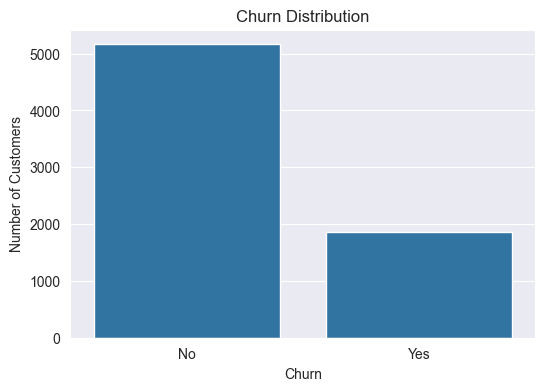

In [13]:
#churn distribution

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.savefig("../results/churn_distribution.png") 
plt.show()

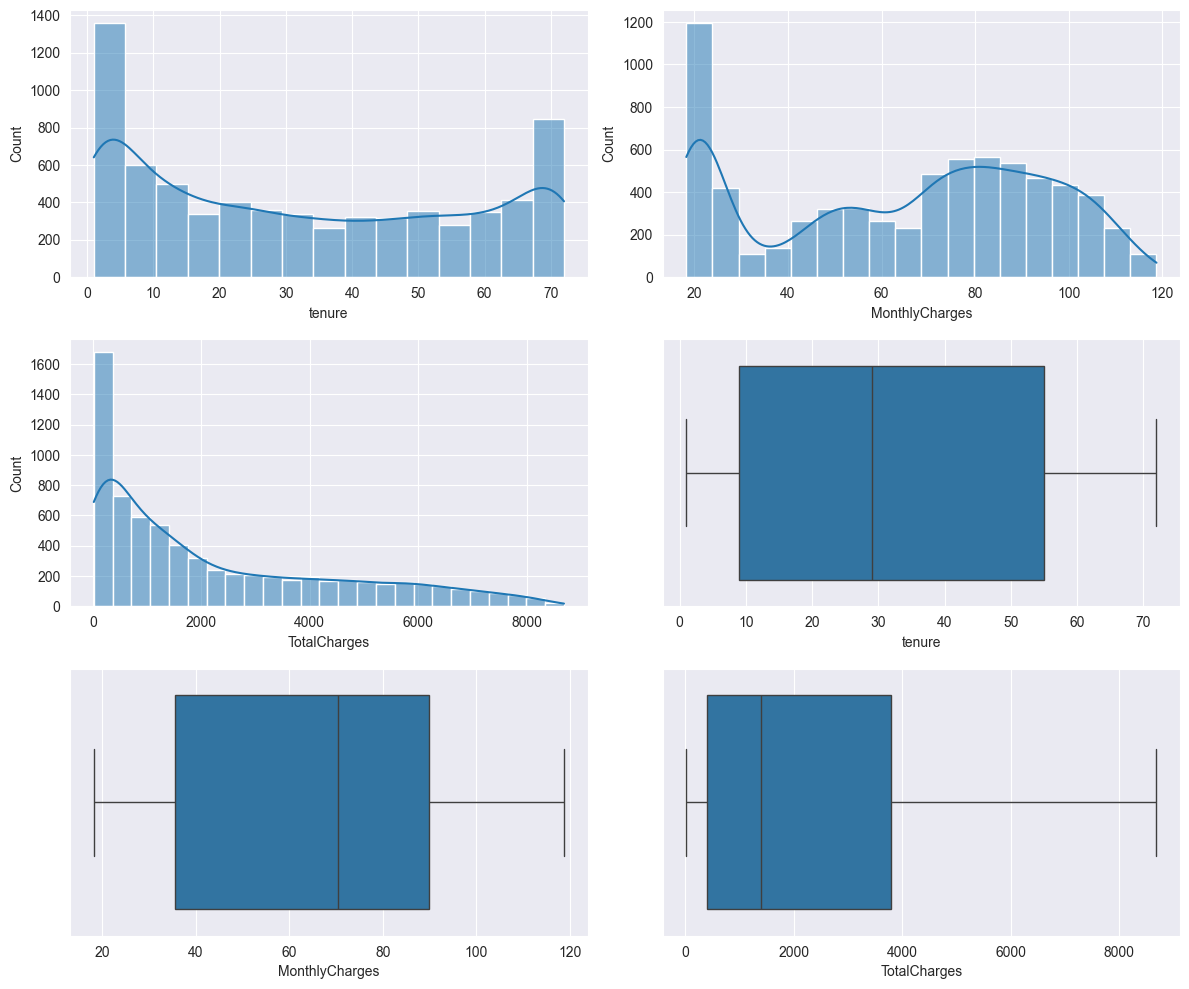

In [14]:
# Numerical Distributions

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    
    plt.subplot(3, 2, i+3)
    sns.boxplot(x=df[col])
plt.tight_layout()
plt.savefig("../results/numerical_distribution.png") 
plt.show()



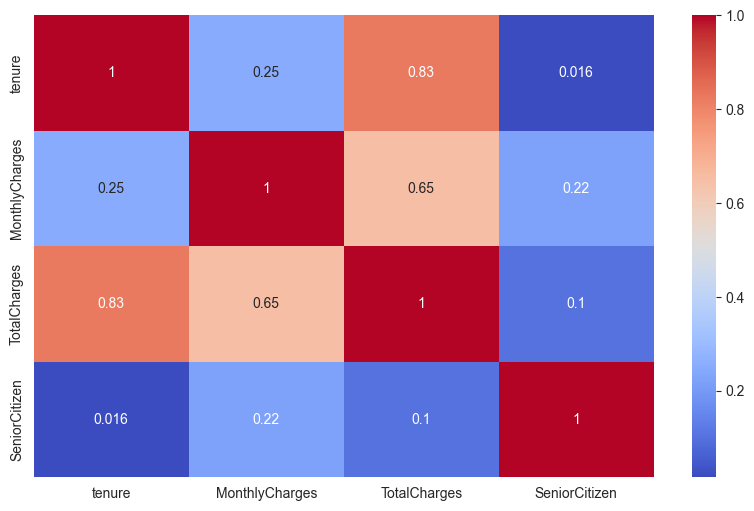

In [15]:
# Correlation Heatmap
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.savefig("../results/correlation_heatmap.png") 
plt.show()




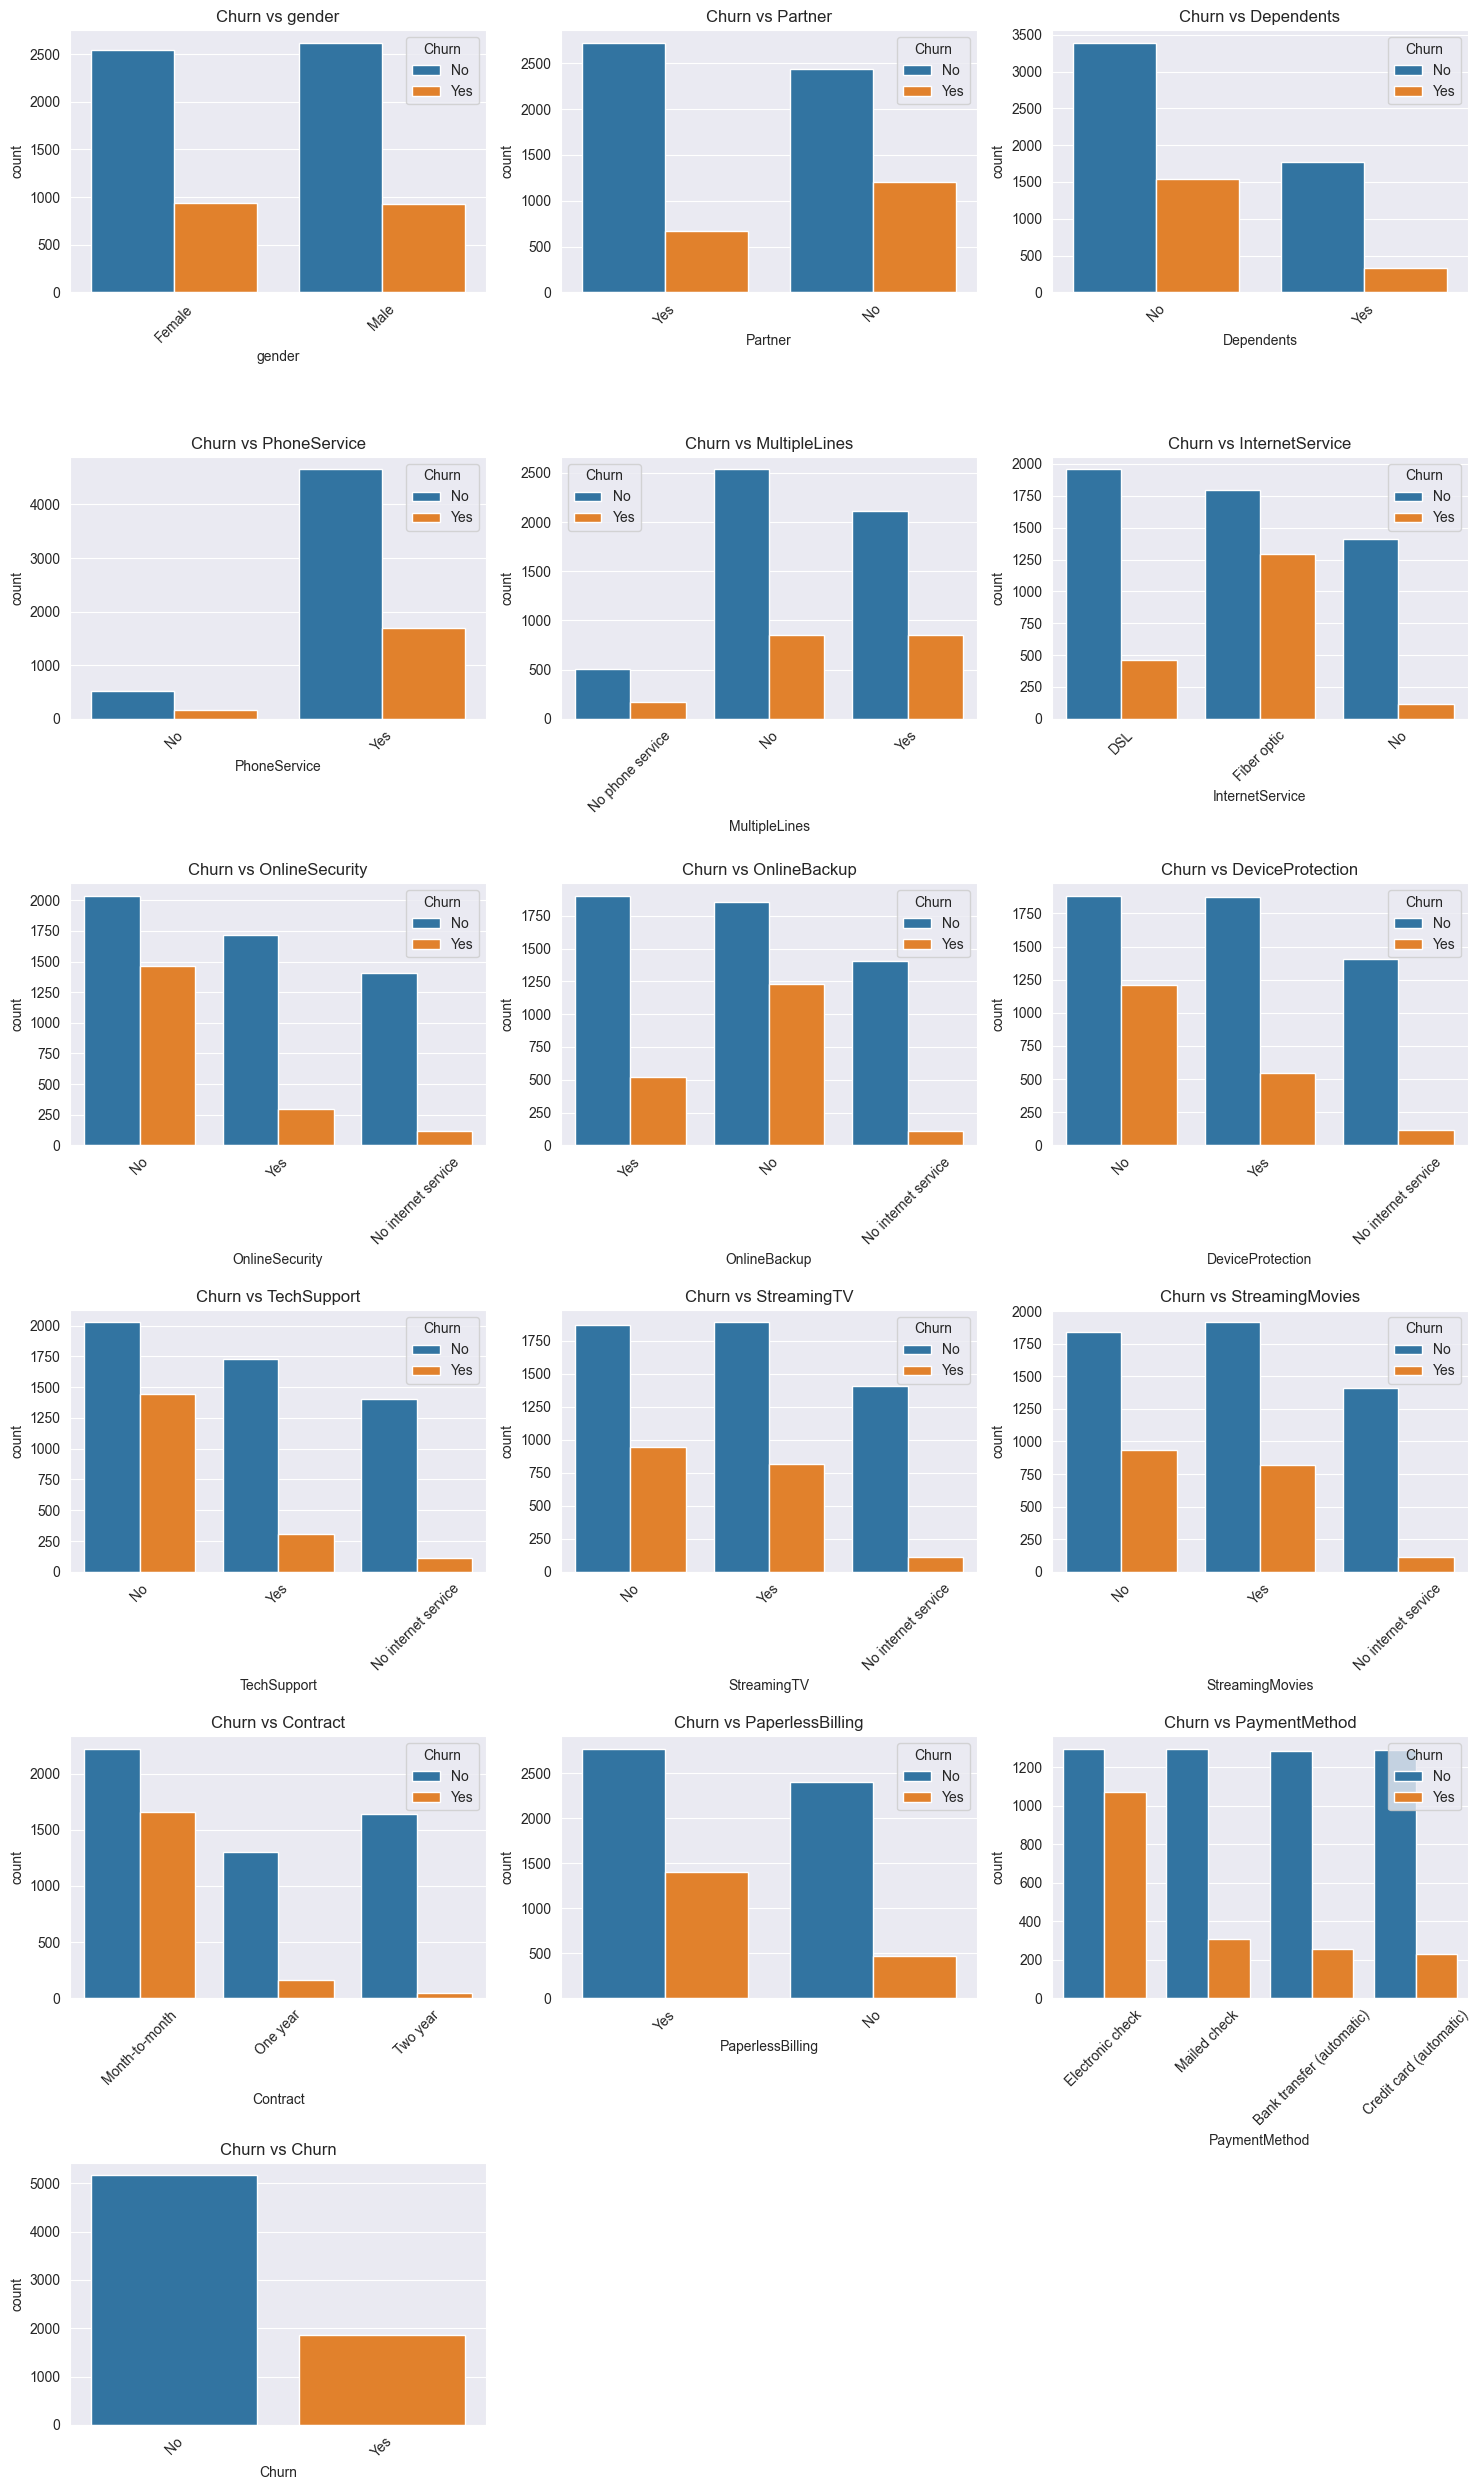

In [17]:
# Churn vs Categorical Features
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('customerID')

plt.figure(figsize=(15, 25))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.xticks(rotation=45)
    plt.title(f"Churn vs {col}") 
plt.tight_layout()
plt.savefig("../results/churn_vs_categorical_features.png") 
plt.show()



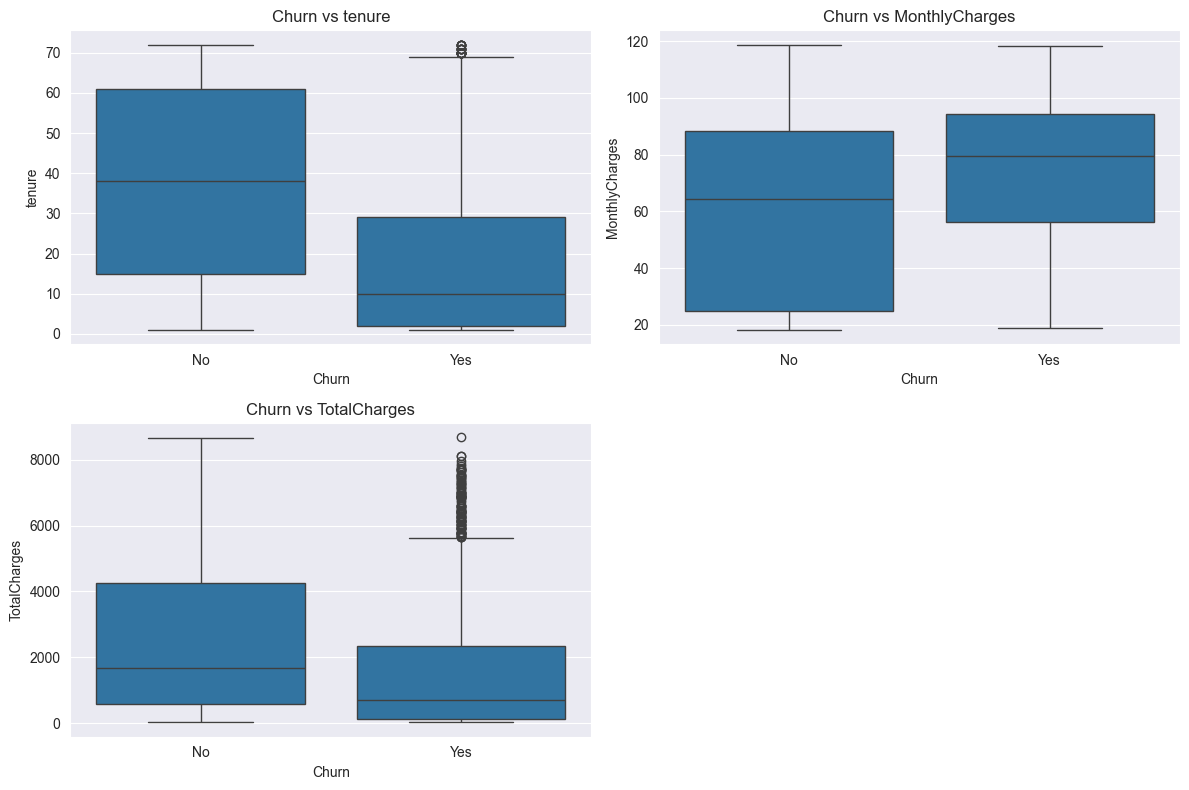

In [35]:
# Churn vs Numerical Features

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f"Churn vs {col}") 
plt.tight_layout()
plt.savefig("../results/churn_vs_numerical_features.png") 
plt.show()




Tenure and TotalCharges show natural outliers due to customers with very long contract durations. These outliers can be valid and represent genuine customer behavior, so they were kept in the dataset. 


## Observations from EDA:
- The dataset is imbalanced: about 73% of customers did not churn, and 27% did.  
- Customers with shorter tenure are more likely to churn.  
- Higher monthly charges are associated with higher churn.  
- Month-to-month contracts have higher churn compared to longer-term contracts.  
- Fiber optic internet customers churn more than DSL or no internet customers.  
- Lack of services like OnlineSecurity, TechSupport, or DeviceProtection is linked to higher churn.  
- Customers using electronic check payments have higher churn.   
- Outliers exist in Tenure and TotalCharges but can be retained.

